In [12]:

import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import datetime as dt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import statistics
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import SGDRegressor

#importing the KSU and MAC season 4 dataset and extracting the cultivars common in both the datasets
df1=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/KSU/ksu_flowering_2020-04-07T085237.csv" , delimiter=",")
df1.rename(columns = {'pass':'column', 'value':'days_to_flowering'}, inplace = True)

df2=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/MAC season 4/Phenotypes/Modified/days_gdd_to_flowering_season_4_2020-03-10T175312.csv" , delimiter=",")
df2.rename(columns = {'value':'days_to_flowering'}, inplace = True)

km=np.intersect1d(df2['cultivar'], df1['cultivar'])
fl1=df1[df1["cultivar"].isin(km)]
fl2=df2[df2["cultivar"].isin(km)]

fl2=df2[df2["cultivar"].isin(km)]

fl2.index = pd.RangeIndex(start=0, stop=102, step=1)
fl1.index = pd.RangeIndex(start=0, stop=77, step=1)

fl2_date=fl2["date_of_flowering"]

Index(['sitename', 'range', 'column', 'lat', 'lon', 'treatment', 'trait',
       'trait_description', 'method_name', 'cultivar', 'days_to_flowering',
       'units', 'date_of_flowering', 'gdd'],
      dtype='object')


In [2]:
#Visualization for flowering data
fl1.loc[:,'set']= 'KSU'
fl2.loc[:,'set']= 'MAC season 4'

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [7]:
#creating environmental features from weather data for MAC season 4. Calculating the mean, minimum and maximum for the variables.

env=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/MAC season 4/Environmental/weather_station_season_4_2019-12-20T190949.csv")
env['date']=pd.to_datetime(env.date)

#for mean
tmax = []
tmin = []
rh3 = []
p1=[]
wsm = []
mws = []
gdd = []
for j in range(len(fl2_date)):
    li = (env['date']>= '2017-04-20') & (env['date'] <= fl2_date[j])
    df_1 = env[li]
    tmax.append(df_1['air_temp_max'].mean())
    tmin.append(df_1['air_temp_min'].mean())
    rh3.append(df_1['rh_mean'].mean())
    p1.append(df_1['precip_total'].mean())
    wsm.append(df_1['wind_speed_mean'].mean())
    mws.append(df_1['max_wind_speed'].mean())
    gdd.append(df_1['gdd'].mean())

fl2.insert(1,'temp_max_mean',tmax)
fl2.insert(2,'temp_min_mean',tmin)
fl2.insert(6,'rh_mean_mean',rh3)
fl2.insert(7,'totalpre_mean',p1)
fl2.insert(8,'wspeedmean_mean',wsm)
fl2.insert(12,'maxwind_mean',mws)
fl2.insert(13,'gddmean',gdd)

#for maximum
t1= []
t2= []
r3 = []
p11=[]
wsm1 = []
mws1 = []
gdd1 = []

for j in range(len(fl2_date)):
    li = (env['date']>= '2016-06-17') & (env['date'] <= fl2_date[j])
    df_1 = env[li]
    t1.append(df_1['air_temp_max'].max())
    t2.append(df_1['air_temp_min'].max())
    r3.append(df_1['rh_mean'].max())
    p11.append(df_1['precip_total'].max())
    wsm1.append(df_1['wind_speed_mean'].max())
    mws1.append(df_1['max_wind_speed'].max())
    gdd1.append(df_1['gdd'].max())

fl2.insert(1,'temp_max_max',t1)
fl2.insert(2,'temp_min_max',t2)
fl2.insert(3,'rh_mean_max',r3)
fl2.insert(4,'totalpre_max',p11)
fl2.insert(5,'wspeedmean_max',wsm1)
fl2.insert(6,'maxwind_max',mws1)
fl2.insert(7,'gddmax',gdd1)

#for minimum
t12= []
t22= []
r32 = []
p12=[]
wsm2 = []
mws2 = []
gdd2 = []

for j in range(len(fl2_date)):
    li = (env['date']>= '2016-06-17') & (env['date'] <= fl2_date[j])
    df_1 = env[li]
    t12.append(df_1['air_temp_max'].min())
    t22.append(df_1['air_temp_min'].min())
    r32.append(df_1['rh_mean'].min())
    p12.append(df_1['precip_total'].min())
    wsm2.append(df_1['wind_speed_mean'].min())
    mws2.append(df_1['max_wind_speed'].min())
    gdd2.append(df_1['gdd'].min())

fl2.insert(1,'temp_max_min',t12)
fl2.insert(2,'temp_min_min',t22)
fl2.insert(3,'rh_mean_min',r32)
fl2.insert(4,'totalpre_min',p12)
fl2.insert(5,'wspeedmean_min',wsm2)
fl2.insert(6,'maxwind_min',mws2)
fl2.insert(7,'gddmin',gdd2)


ValueError: cannot insert temp_max_mean, already exists

In [8]:
#creating environmental features from weather data for KSU. Calculating the mean, minimum and maximum for the variables.

fl1_date=fl1["date_of_flowering"]
ksw=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/KSU/ashland_bottoms_weather_2016_daily_2020-06-15.csv" , delimiter=",")
ksw['date']=pd.to_datetime(ksw.date)
tmax = []
tmin = []
rh3 = []
p1=[]
wsm = []
mws = []
gdd = []

#for mean
for j in range(len(fl1_date)):
    li = (ksw['date']>= '2016-06-17') & (ksw['date'] <= fl1_date[j])
    df_1 = ksw[li]
    tmax.append(df_1['air_temp_max_C'].mean())
    tmin.append(df_1['air_temp_min_C'].mean())
    rh3.append(df_1['avg_rh'].mean())
    p1.append(df_1['precip_mm'].mean())
    wsm.append(df_1['avg_wind_speed'].mean())
    mws.append(df_1['max_wind_speed'].mean())
    gdd.append(df_1['gdd'].mean())

fl1.insert(1,'temp_max_mean',tmax)
fl1.insert(2,'temp_min_mean',tmin)
fl1.insert(6,'rh_mean_mean',rh3)
fl1.insert(7,'totalpre_mean',p1)
fl1.insert(8,'wspeedmean_mean',wsm)
fl1.insert(12,'maxwind_mean',mws)
fl1.insert(13,'gddmean',gdd)

#for maximum
t1= []
t2= []
r3 = []
p11=[]
wsm1 = []
mws1 = []
gdd1 = []

for j in range(len(fl1_date)):
    li = (ksw['date']>= '2016-06-17') & (ksw['date'] <= fl1_date[j])
    df_1 = ksw[li]
    t1.append(df_1['air_temp_max_C'].max())
    t2.append(df_1['air_temp_min_C'].max())
    r3.append(df_1['avg_rh'].max())
    p11.append(df_1['precip_mm'].max())
    wsm1.append(df_1['avg_wind_speed'].max())
    mws1.append(df_1['max_wind_speed'].max())
    gdd1.append(df_1['gdd'].max())

fl1.insert(1,'temp_max_max',t1)
fl1.insert(2,'temp_min_max',t2)
fl1.insert(3,'rh_mean_max',r3)
fl1.insert(4,'totalpre_max',p11)
fl1.insert(5,'wspeedmean_max',wsm1)
fl1.insert(6,'maxwind_max',mws1)
fl1.insert(7,'gddmax',gdd1)

#for minimum
t12= []
t22= []
r32 = []
p12=[]
wsm2 = []
mws2 = []
gdd2 = []

for j in range(len(fl1_date)):
    li = (ksw['date']>= '2016-06-17') & (ksw['date'] <= fl1_date[j])
    df_1 = ksw[li]
    t12.append(df_1['air_temp_max_C'].min())
    t22.append(df_1['air_temp_min_C'].min())
    r32.append(df_1['avg_rh'].min())
    p12.append(df_1['precip_mm'].min())
    wsm2.append(df_1['avg_wind_speed'].min())
    mws2.append(df_1['max_wind_speed'].min())
    gdd2.append(df_1['gdd'].min())

fl1.insert(1,'temp_max_min',t12)
fl1.insert(2,'temp_min_min',t22)
fl1.insert(3,'rh_mean_min',r32)
fl1.insert(4,'totalpre_min',p12)
fl1.insert(5,'wspeedmean_min',wsm2)
fl1.insert(6,'maxwind_min',mws2)
fl1.insert(7,'gddmin',gdd2)


ValueError: cannot insert temp_max_mean, already exists

In [9]:

#combining KSU and MAC season 4 datasets
tmp1=fl1[['temp_max_mean', 'temp_min_mean', 'rh_mean_mean', 'totalpre_mean',
'wspeedmean_mean', 'maxwind_mean', 'gddmean', 'range', 'column',
'temp_max_max', 'temp_min_max','rh_mean_max','totalpre_max', 'wspeedmean_max','maxwind_max', 
'gddmax', 'temp_max_min', 'temp_min_min','rh_mean_min','totalpre_min',
'wspeedmean_min','maxwind_min', 'gddmin','cultivar','days_to_flowering','set']]

tmp2=fl2[['temp_max_mean', 'temp_min_mean', 'rh_mean_mean', 'totalpre_mean',
'wspeedmean_mean', 'maxwind_mean', 'gddmean', 'range', 'column',
'temp_max_max', 'temp_min_max','rh_mean_max','totalpre_max', 'wspeedmean_max','maxwind_max', 
'gddmax', 'temp_max_min', 'temp_min_min','rh_mean_min','totalpre_min',
'wspeedmean_min','maxwind_min', 'gddmin','cultivar','days_to_flowering','set']]

result = tmp1.append(tmp2, ignore_index=True)

comb=pd.concat([pd.get_dummies(result['cultivar'], prefix='cult'),result],axis=1)

d=comb.drop(columns=['cultivar','days_to_flowering', 'set'])

X=d.to_numpy()
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

y = comb[['days_to_flowering']]
y = np.asarray(y).flatten()


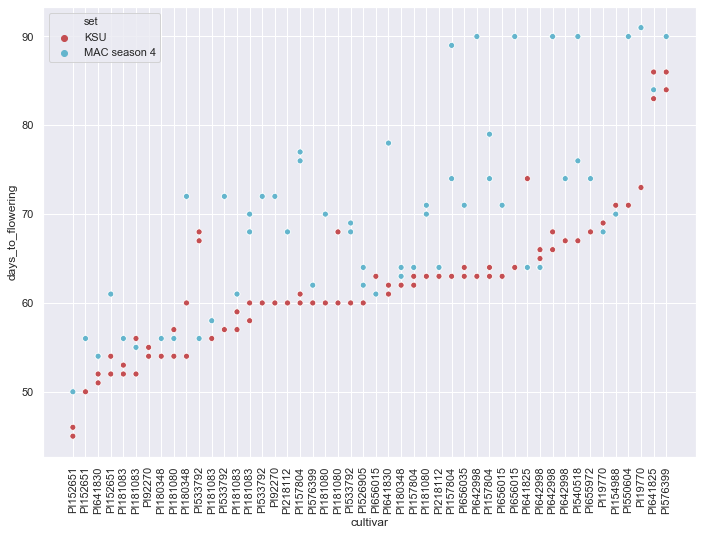

In [13]:
sns.set(style='whitegrid')
result=result.sort_values("days_to_flowering",axis=0, ascending=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
e= result.set
f= result.days_to_flowering
g= result.cultivar
chart=sns.scatterplot(g,f, hue=e , palette=["r", "c"])

chart.set_xticklabels(labels=g, rotation=90)
plt.show()

In [14]:
# 5 fold cross-validation for Random Forest Regression

ns=5
cv = KFold(n_splits=ns, shuffle=True, random_state=None)
error=0
R2=0
e=[]
for train_index, test_index in cv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print('TRAIN :',X_train.shape, 'TEST :', X_test.shape)
    crf=RandomForestRegressor(n_estimators=71).fit(X_train, y_train)

    pred_cl=crf.predict(X_test)
    #error=error+math.sqrt(np.sum((pred_cl-y_test)**2)/y_test.shape[0])
    R2=R2+r2_score(y_test, pred_cl)
    e.append(math.sqrt(mean_squared_error(y_test, pred_cl)))
    error=error+math.sqrt(mean_squared_error(y_test, pred_cl))

std= (statistics.stdev(e))
print('R^2 for 5-fold CV RF:', R2/ns)
print('Root Mean square error for 5-fold CV RF',error/ns,'+-', std)

# 5 fold cross-validation for Stochastic Gradient Descent Regression

cv = KFold(n_splits=ns, shuffle=True, random_state=None)
error=0
R2=0
e=[]
for train_index, test_index in cv.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clm=SGDRegressor().fit(X_train, y_train)
    pred_cl=clm.predict(X_test)
    error=error+math.sqrt(mean_squared_error(y_test, pred_cl))
    e.append(math.sqrt(mean_squared_error(y_test, pred_cl)))
    R2=R2+r2_score(y_test, pred_cl)
    
std= (statistics.stdev(e))

print('R^2 for 5-fold CV SG:', R2/ns)
print('Root Mean square error for 5-fold CV SG:',error/ns, '+-', std)


TRAIN : (143, 71) TEST : (36, 71)
TRAIN : (143, 71) TEST : (36, 71)
TRAIN : (143, 71) TEST : (36, 71)
TRAIN : (143, 71) TEST : (36, 71)
TRAIN : (144, 71) TEST : (35, 71)
R^2 for 5-fold CV RF: 0.997372341977558
Root Mean square error for 5-fold CV RF 0.4964691434289853 +- 0.2280810615255034
R^2 for 5-fold CV SG: 0.9743023287628935
Root Mean square error for 5-fold CV SG: 1.698683267930398 +- 0.26584614640954574
